In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=1f558d516246b307686b76db7fba36be63ca6aa4582ac5b4610d173820e28ac9
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyswarm import pso
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy import stats

#Read Dataset

In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/TA/Dataset of Diabetes .csv'
data = pd.read_csv(file_path, sep=",")

display(data.head())

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
data['Gender'] = data['Gender'].replace({'F': 0,' F': 0,'F ': 0, 'M': 1,' M': 1,'M ': 1, 'f':0}).astype(int)

data['CLASS'] = data['CLASS'].replace({'N': 0,' N': 0,'N ': 0, 'P': 1,' P': 1,'P ': 1, 'Y':2, ' Y':2, 'Y ':2}).astype(int)

display(data)

/tmp/ipython-input-5-14341680.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 0,' F': 0,'F ': 0, 'M': 1,' M': 1,'M ': 1, 'f':0}).astype(int)
/tmp/ipython-input-5-14341680.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['CLASS'] = data['CLASS'].replace({'N': 0,' N': 0,'N ': 0, 'P': 1,' P': 1,'P ': 1, 'Y':2, ' Y':2, 'Y ':2}).astype(int)


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [ ]:
# Rename columns
data = data.rename(columns={'AGE': 'Age', 'Cr': 'Creatine', 'Chol': 'Cholesterol', 'TG': 'Trigliserida', 'CLASS': 'Class'})

# Display the updated DataFrame to verify the changes
display(data)

,ID,No_Pation,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [ ]:
data = data.drop(['ID', 'No_Pation'], axis=1)

In [ ]:
# Cek duplikat
duplicates = data[data.duplicated()]

if not duplicates.empty:
    print("Duplicate Rows:")
    display(duplicates)
else:
    print("No duplicate rows found.")

Duplicate Rows:


,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
17,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,0
33,0,42,5.0,73,4.5,6.2,1.0,1.1,4.6,0.4,24.0,0
42,1,33,2.0,54,5.4,3.7,1.3,0.8,2.4,0.6,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
991,0,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [ ]:
data=data.drop_duplicates()

In [ ]:
data

,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2
992,1,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,2
994,1,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,2


#EDA

## Pengecekan nilai null di dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 995
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        826 non-null    int64  
 1   Age           826 non-null    int64  
 2   Urea          826 non-null    float64
 3   Creatine      826 non-null    int64  
 4   HbA1c         826 non-null    float64
 5   Cholesterol   826 non-null    float64
 6   Trigliserida  826 non-null    float64
 7   HDL           826 non-null    float64
 8   LDL           826 non-null    float64
 9   VLDL          826 non-null    float64
 10  BMI           826 non-null    float64
 11  Class         826 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 83.9 KB


In [ ]:
# Cek duplikat
duplicates = data[data.duplicated()]

if not duplicates.empty:
    print("Duplicate Rows:")
    display(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## Pengecekan entry duplikat pada dataset

In [ ]:
data1 = data.copy()

In [ ]:

# Replace gender values
data1['Gender'] = data1['Gender'].replace({0: 'Female', 1: 'Male'})

# Replace class values
data1['Class'] = data1['Class'].replace({0: 'Nondiabetes', 1: 'Pradiabetes', 2: 'Diabetes'})

# Display the updated DataFrame
display(data1.head())

,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Nondiabetes
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Nondiabetes
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Nondiabetes
5,Female,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,Nondiabetes
6,Female,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,Nondiabetes


## Statistika deskriptif kolom numerik

In [ ]:
data1.describe()

,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.00000,826.000000,826.000000,826.000000,826.000000
mean,53.490315,5.184677,69.024213,8.326344,4.898208,2.39937,1.211804,2.590061,1.774576,29.459274
std,8.808427,3.077831,59.557108,2.602589,1.328812,1.45685,0.679610,1.132863,3.517931,4.996676
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.30000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.615000,48.000000,6.500000,4.000000,1.50000,0.900000,1.700000,0.700000,26.000000
50%,55.000000,4.600000,59.000000,8.100000,4.800000,2.01500,1.100000,2.500000,1.000000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,3.00000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.80000,9.900000,9.900000,35.000000,47.750000


## statistika deskriptif kolom kategorikal

In [ ]:
data1.describe(include='object')

,Gender,Class
count,826,826
unique,2,3
top,Male,Diabetes
freq,463,690


## Pengecekan nilai entry yang value 0

In [ ]:
rows_with_zeros = data1[(data1 == 0).any(axis=1)]

# Display the rows
print(rows_with_zeros)

   Gender  Age  Urea  Creatine  HbA1c  Cholesterol  Trigliserida  HDL  LDL  \
99   Male   77   5.0       106    5.4          0.0           2.8  0.8  1.8   

    VLDL   BMI        Class  
99   0.7  19.0  Nondiabetes  


In [ ]:
categorical_value = data1[["Gender","Class"]]
numerical_value = data1[['Age','Cholesterol','Creatine', 'HDL', 'LDL', 'VLDL', 'Urea', 'HbA1c','Trigliserida','BMI']]

## Distribusi class menggunakan Pie Chart

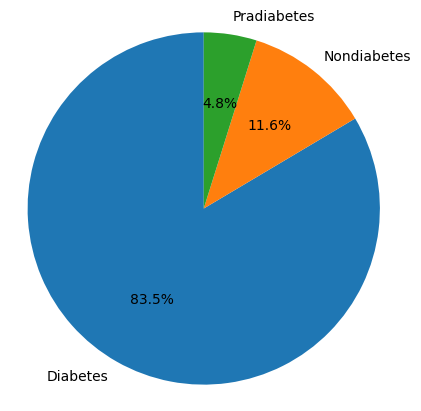

In [ ]:
# prompt: make a pie chart for Class column

# Assuming data1 DataFrame is already created as shown in the previous code.

import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = data1['Class'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Pengecekan nilai outlier dalam dataset

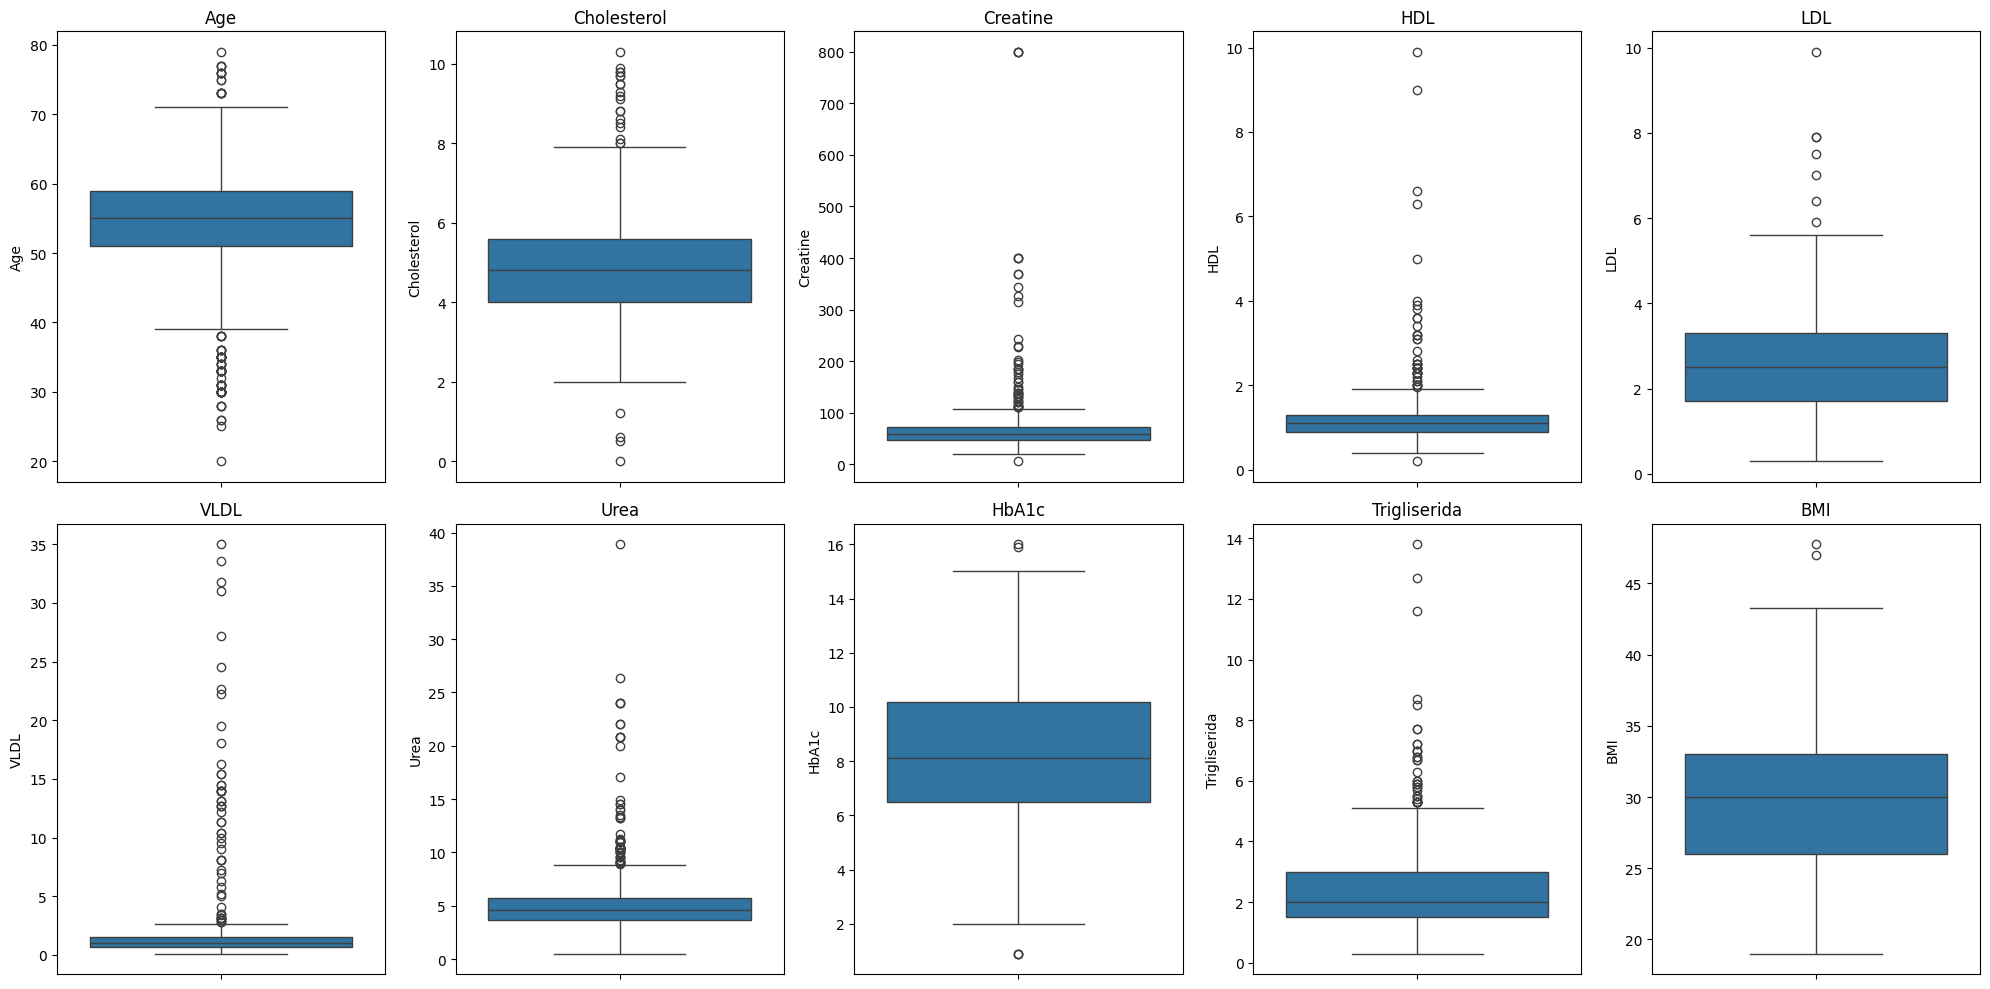

In [ ]:
# prompt: make boxplot for numerical value in 3 column and 3 row

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_value' DataFrame is already defined

# Reshape the data for the subplots
num_cols = 5  # Changed to 3 columns
num_rows = 2  # Changed to 3 rows
num_cols_per_row = num_cols

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 10))  # Adjust figsize as needed

for i, col in enumerate(numerical_value.columns):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    sns.boxplot(y=numerical_value[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

In [ ]:
min_max_table = pd.DataFrame({
    'Minimum': data1.min(),
    'Maximum': data1.max()
})

# Menampilkan tabel
print(min_max_table)

               Minimum      Maximum
Gender          Female         Male
Age                 20           79
Urea               0.5         38.9
Creatine             6          800
HbA1c              0.9         16.0
Cholesterol        0.0         10.3
Trigliserida       0.3         13.8
HDL                0.2          9.9
LDL                0.3          9.9
VLDL               0.1         35.0
BMI               19.0        47.75
Class         Diabetes  Pradiabetes


## Penanganan nilai kosong pada kolom cholesterol

In [ ]:
chol_avg_by_LDL = data1.groupby('LDL')['Cholesterol'].mean().reset_index()

def impute_chol(row, chol_avg_df):
    if row['Cholesterol'] == 0 or row['Cholesterol'] == 0.00:  #
        matching_row = chol_avg_df[chol_avg_df['LDL'] == row['LDL']]
        return matching_row['Cholesterol'].values[0]
    else:
        return row['Cholesterol']

data1['Cholesterol'] = data1.apply(lambda row: impute_chol(row, chol_avg_by_LDL), axis=1)

In [ ]:
print(data1[data1['Cholesterol'] == 0])

Empty DataFrame
Columns: [Gender, Age, Urea, Creatine, HbA1c, Cholesterol, Trigliserida, HDL, LDL, VLDL, BMI, Class]
Index: []


In [ ]:
data1.iloc[98]

,106
Gender,Male
Age,31
Urea,3.4
Creatine,55
HbA1c,5.7
Cholesterol,4.9
Trigliserida,1.6
HDL,1.0
LDL,3.2
VLDL,0.7


## Univariat Analysis

### Cholesterol

Text(3.9229370460048423, 75.60000000000001, 'Mean: 4.90')

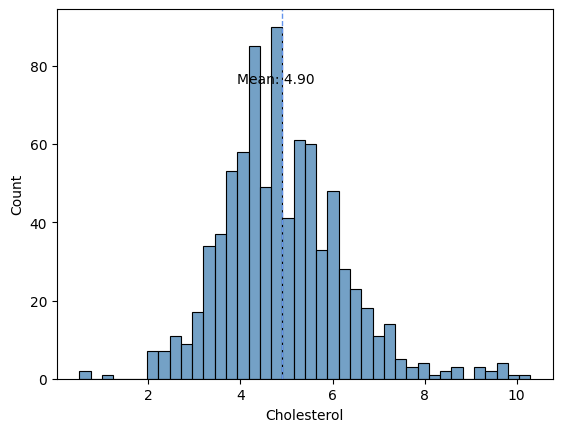

In [ ]:
sns.histplot(data1['Cholesterol'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Cholesterol'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Cholesterol'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Cholesterol'].mean()))

In [ ]:
mean_age = data1['Cholesterol'].mean()    # Rata-rata
min_age = data1['Cholesterol'].min()      # Nilai minimum
max_age = data1['Cholesterol'].max()      # Nilai maksimum
median_age = data1['Cholesterol'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 4.903671307506053
Minimal: 0.5
Maksimal: 10.3
Median: 4.8


### Gender

/tmp/ipython-input-27-1560249144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-27-1560249144.py:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


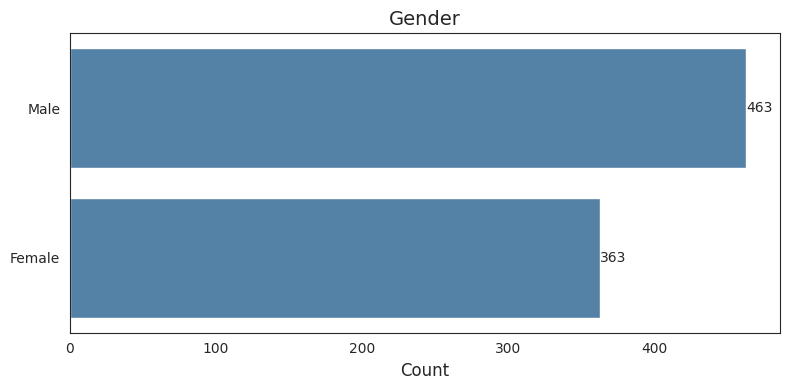

In [ ]:
sns.set_style("white")

plt.figure(figsize=(8, 4))
sns.countplot(
    data=data1,
    y='Gender',
    palette=['steelblue'],  # Single color for all bars
    order=data1['Gender'].value_counts().index  # Ensure order based on counts
)

# Add labels for counts on the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

# Add chart title and axis labels
plt.title('Gender', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')


# Adjust layout for better appearance
plt.tight_layout()
plt.show()

###Age

Text(42.792251815980634, 180.60000000000002, 'Mean: 53.49')

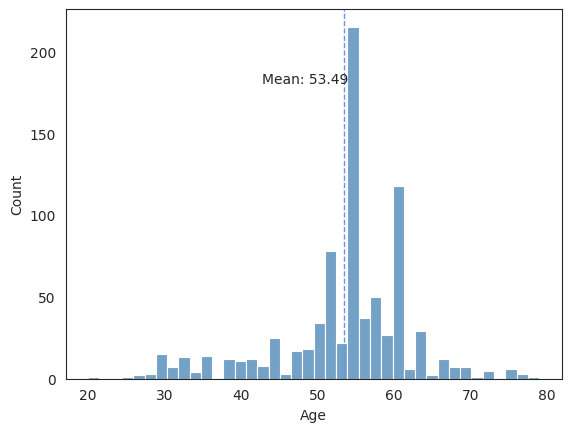

In [ ]:
sns.histplot(data1['Age'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Age'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Age'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Age'].mean()))

In [ ]:
mean_age = data1['Age'].mean()    # Rata-rata
min_age = data1['Age'].min()      # Nilai minimum
max_age = data1['Age'].max()      # Nilai maksimum
median_age = data1['Age'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 53.49031476997579
Minimal: 20
Maksimal: 79
Median: 55.0


### Urea

Text(4.147741404358353, 172.20000000000002, 'Mean: 5.18')

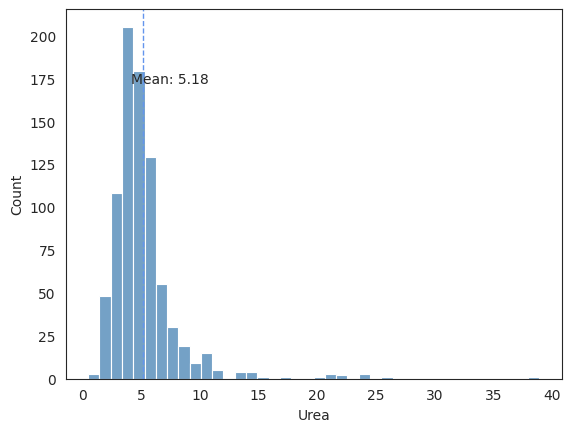

In [ ]:
sns.set_style("white")

sns.histplot(data1['Urea'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Urea'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Urea'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Urea'].mean()))


In [ ]:
mean_age = data1['Urea'].mean()    # Rata-rata
min_age = data1['Urea'].min()      # Nilai minimum
max_age = data1['Urea'].max()      # Nilai maksimum
median_age = data1['Urea'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 5.184676755447941
Minimal: 0.5
Maksimal: 38.9
Median: 4.6


### HDL

Text(0.9694430992736079, 288.96, 'Mean: 1.21')

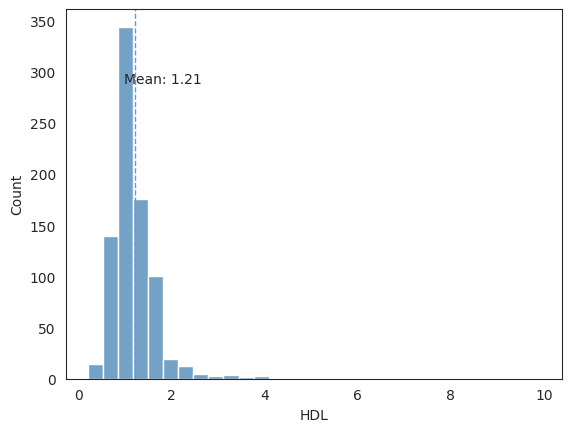

In [ ]:
sns.set_style("white")

sns.histplot(data1['HDL'], bins=30, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['HDL'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['HDL'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['HDL'].mean()))

In [ ]:
mean_age = data1['HDL'].mean()    # Rata-rata
min_age = data1['HDL'].min()      # Nilai minimum
max_age = data1['HDL'].max()      # Nilai maksimum
median_age = data1['HDL'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 1.2118038740920098
Minimal: 0.2
Maksimal: 9.9
Median: 1.1


### LDL

Text(2.072048426150121, 72.24, 'Mean: 2.59')

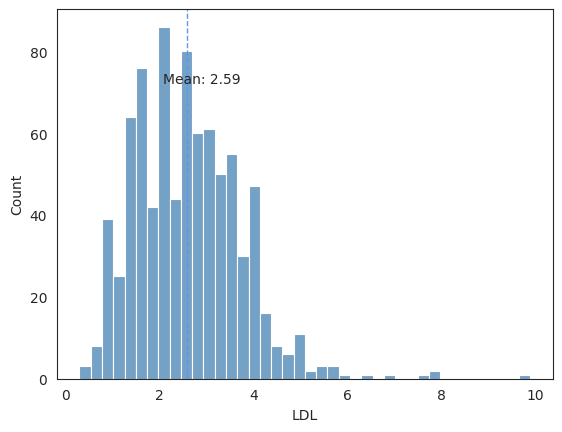

In [ ]:
sns.set_style("white")

sns.histplot(data1['LDL'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['LDL'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['LDL'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['LDL'].mean()))


In [ ]:
mean_age = data1['LDL'].mean()    # Rata-rata
min_age = data1['LDL'].min()      # Nilai minimum
max_age = data1['LDL'].max()      # Nilai maksimum
median_age = data1['LDL'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 2.590060532687651
Minimal: 0.3
Maksimal: 9.9
Median: 2.5


### VLDL

Text(1.4196610169491528, 448.56000000000006, 'Mean: 1.77')

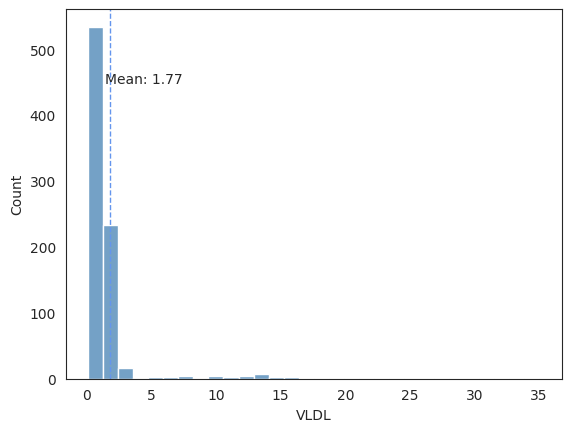

In [ ]:
sns.set_style("white")

sns.histplot(data1['VLDL'], bins=30, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['VLDL'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['VLDL'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['VLDL'].mean()))

In [ ]:
mean_age = data1['VLDL'].mean()    # Rata-rata
min_age = data1['VLDL'].min()      # Nilai minimum
max_age = data1['VLDL'].max()      # Nilai maksimum
median_age = data1['VLDL'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 1.7745762711864408
Minimal: 0.1
Maksimal: 35.0
Median: 1.0


### HbA1c

Text(6.6610750605326885, 52.92000000000001, 'Mean: 8.33')

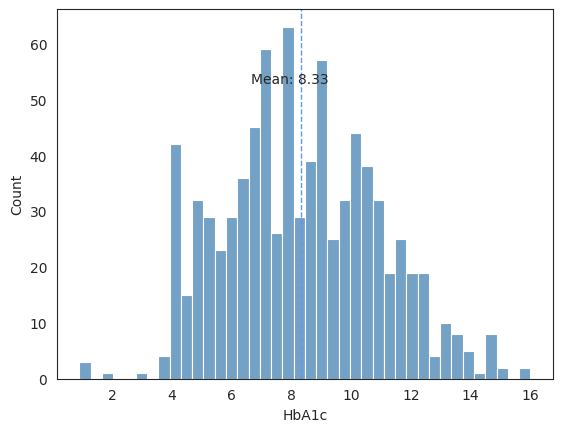

In [ ]:
sns.set_style("white")

sns.histplot(data1['HbA1c'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['HbA1c'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['HbA1c'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['HbA1c'].mean()))


In [ ]:
mean_age = data1['HbA1c'].mean()    # Rata-rata
min_age = data1['HbA1c'].min()      # Nilai minimum
max_age = data1['HbA1c'].max()      # Nilai maksimum
median_age = data1['HbA1c'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 8.32634382566586
Minimal: 0.9
Maksimal: 16.0
Median: 8.1


###Trigliserida

Text(1.9194963680387411, 123.48, 'Mean: 2.40')

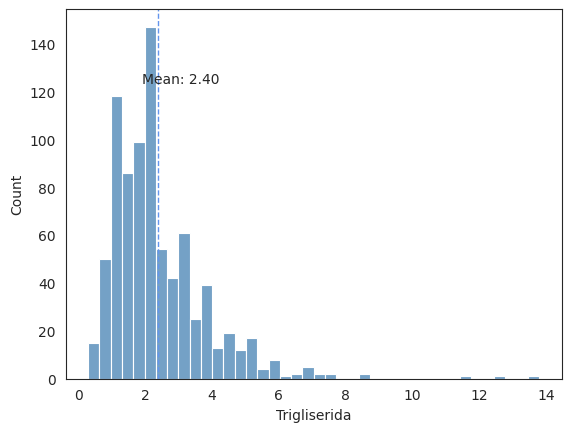

In [ ]:
sns.set_style("white")

sns.histplot(data1['Trigliserida'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Trigliserida'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Trigliserida'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Trigliserida'].mean()))

In [ ]:
mean_age = data1['Trigliserida'].mean()    # Rata-rata
min_age = data1['Trigliserida'].min()      # Nilai minimum
max_age = data1['Trigliserida'].max()      # Nilai maksimum
median_age = data1['Trigliserida'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 2.3993704600484262
Minimal: 0.3
Maksimal: 13.8
Median: 2.0149999999999997


### BMI

Text(23.56741888619855, 83.16000000000001, 'Mean: 29.46')

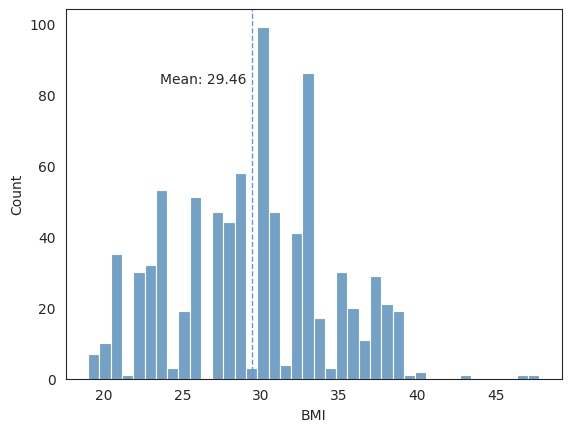

In [ ]:
sns.set_style("white")

sns.histplot(data1['BMI'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['BMI'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['BMI'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['BMI'].mean()))

In [ ]:
mean_age = data1['BMI'].mean()    # Rata-rata
min_age = data1['BMI'].min()      # Nilai minimum
max_age = data1['BMI'].max()      # Nilai maksimum
median_age = data1['BMI'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 29.459273607748184
Minimal: 19.0
Maksimal: 47.75
Median: 30.0


### Creatine

Text(55.219370460048424, 273.84000000000003, 'Mean: 69.02')

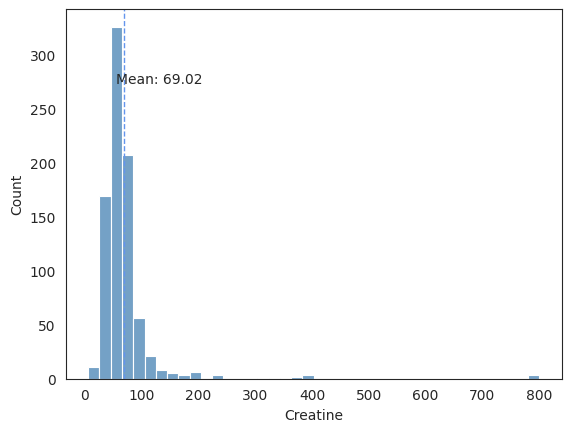

In [ ]:
sns.set_style("white")

sns.histplot(data1['Creatine'], bins=40, color='steelblue')

# Garis vertikal pada mean
plt.axvline(data1['Creatine'].mean(), color='cornflowerblue', linestyle='dashed', linewidth=1)

# Menentukan batas minimum dan maksimum sumbu y
min_ylim, max_ylim = plt.ylim()

# Menambahkan teks dengan nilai rata-rata
plt.text(data1['Creatine'].mean() * 0.8, max_ylim * 0.8, 'Mean: {:.2f}'.format(data1['Creatine'].mean()))

In [ ]:
mean_age = data1['Creatine'].mean()    # Rata-rata
min_age = data1['Creatine'].min()      # Nilai minimum
max_age = data1['Creatine'].max()      # Nilai maksimum
median_age = data1['Creatine'].median()  # Median

print(f"Rata-rata: {mean_age}")
print(f"Minimal: {min_age}")
print(f"Maksimal: {max_age}")
print(f"Median: {median_age}")

Rata-rata: 69.02421307506053
Minimal: 6
Maksimal: 800
Median: 59.0


### Class

/tmp/ipython-input-46-904426995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-46-904426995.py:4: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


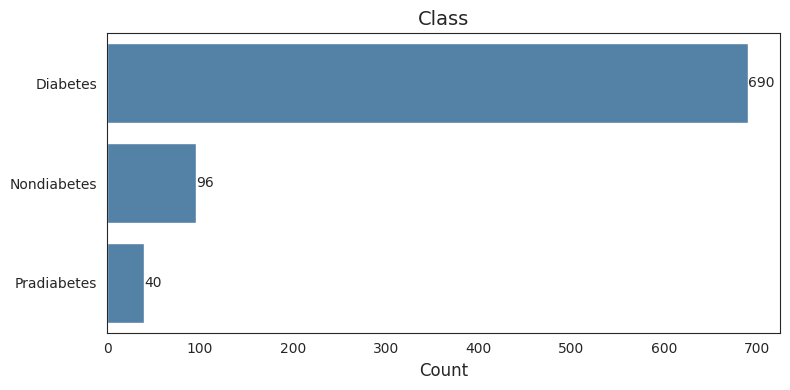

In [ ]:
sns.set_style("white")

plt.figure(figsize=(8, 4))
sns.countplot(
    data=data1,
    y='Class',
    palette=['steelblue'],  # Single color for all bars
    order=data1['Class'].value_counts().index  # Ensure order based on counts
)

# Add labels for counts on the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

# Add chart title and axis labels
plt.title('Class', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('')


# Adjust layout for better appearance
plt.tight_layout()
plt.show()

## Bivariat Analysis

### Cholesterol

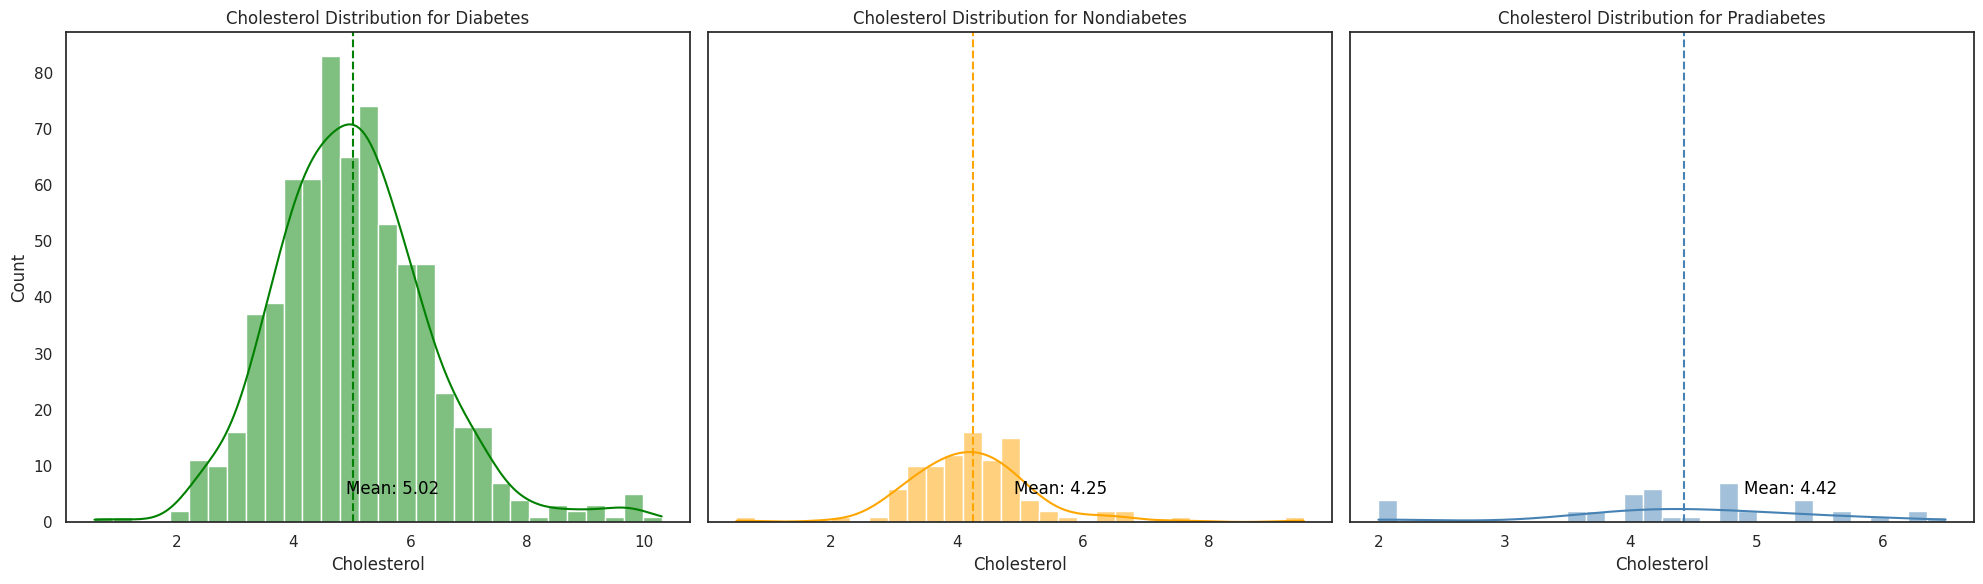

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Cholesterol'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Cholesterol'].mean(), color='green', linestyle='--')
axes[0].set_title('Cholesterol Distribution for Diabetes')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('Count')
axes[0].text(data1['Cholesterol'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Cholesterol'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Cholesterol'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Cholesterol'].mean(), color='orange', linestyle='--')
axes[1].set_title('Cholesterol Distribution for Nondiabetes')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Count')
axes[1].text(data1['Cholesterol'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Cholesterol'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Cholesterol'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Cholesterol'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Cholesterol Distribution for Pradiabetes')
axes[2].set_xlabel('Cholesterol')
axes[2].set_ylabel('Count')
axes[2].text(data1['Cholesterol'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Cholesterol'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


In [ ]:
data1

,Gender,Age,Urea,Creatine,HbA1c,Cholesterol,Trigliserida,HDL,LDL,VLDL,BMI,Class
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Nondiabetes
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Nondiabetes
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Nondiabetes
5,Female,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,Nondiabetes
6,Female,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,Nondiabetes
...,...,...,...,...,...,...,...,...,...,...,...,...
990,Female,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Diabetes
992,Male,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,Diabetes
993,Male,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,Diabetes
994,Male,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,Diabetes


### Gender

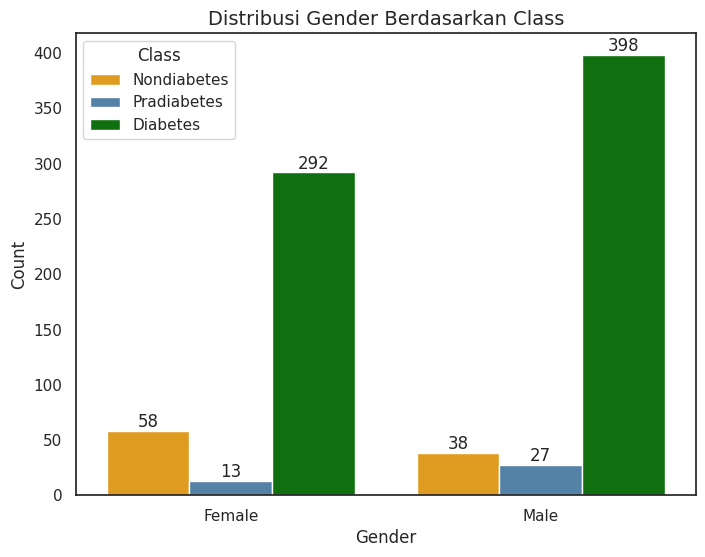

In [ ]:
sns.set_style("white")

custom_palette = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data1, x='Gender', hue='Class', palette=custom_palette)

# Menambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container)

# Menambahkan judul dan label
plt.title('Distribusi Gender Berdasarkan Class', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class')
plt.show()

### Age

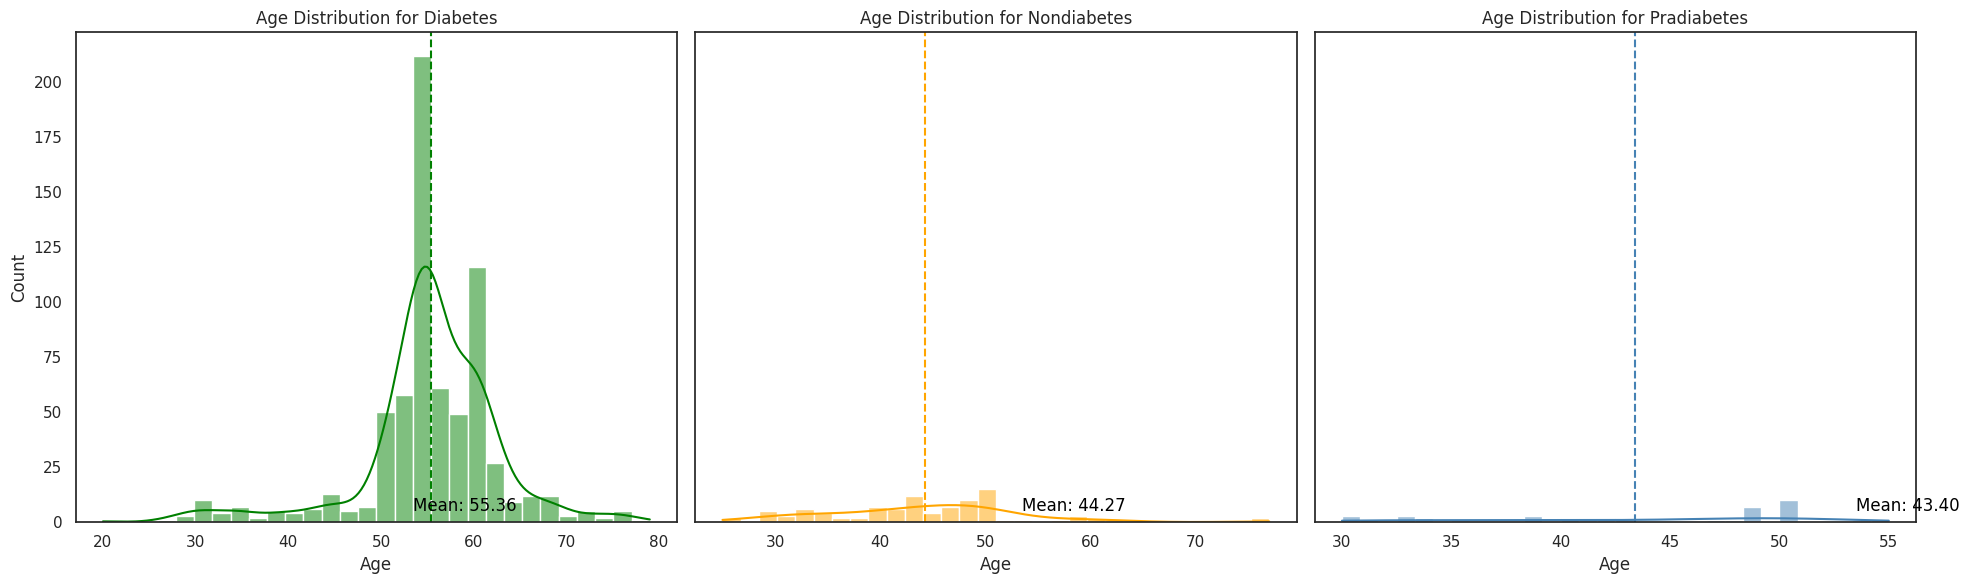

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Age'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Age'].mean(), color='green', linestyle='--')
axes[0].set_title('Age Distribution for Diabetes')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].text(data1['Age'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Age'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Age'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Age'].mean(), color='orange', linestyle='--')
axes[1].set_title('Age Distribution for Nondiabetes')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].text(data1['Age'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Age'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Age'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Age'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Age Distribution for Pradiabetes')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')
axes[2].text(data1['Age'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Age'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

### Urea

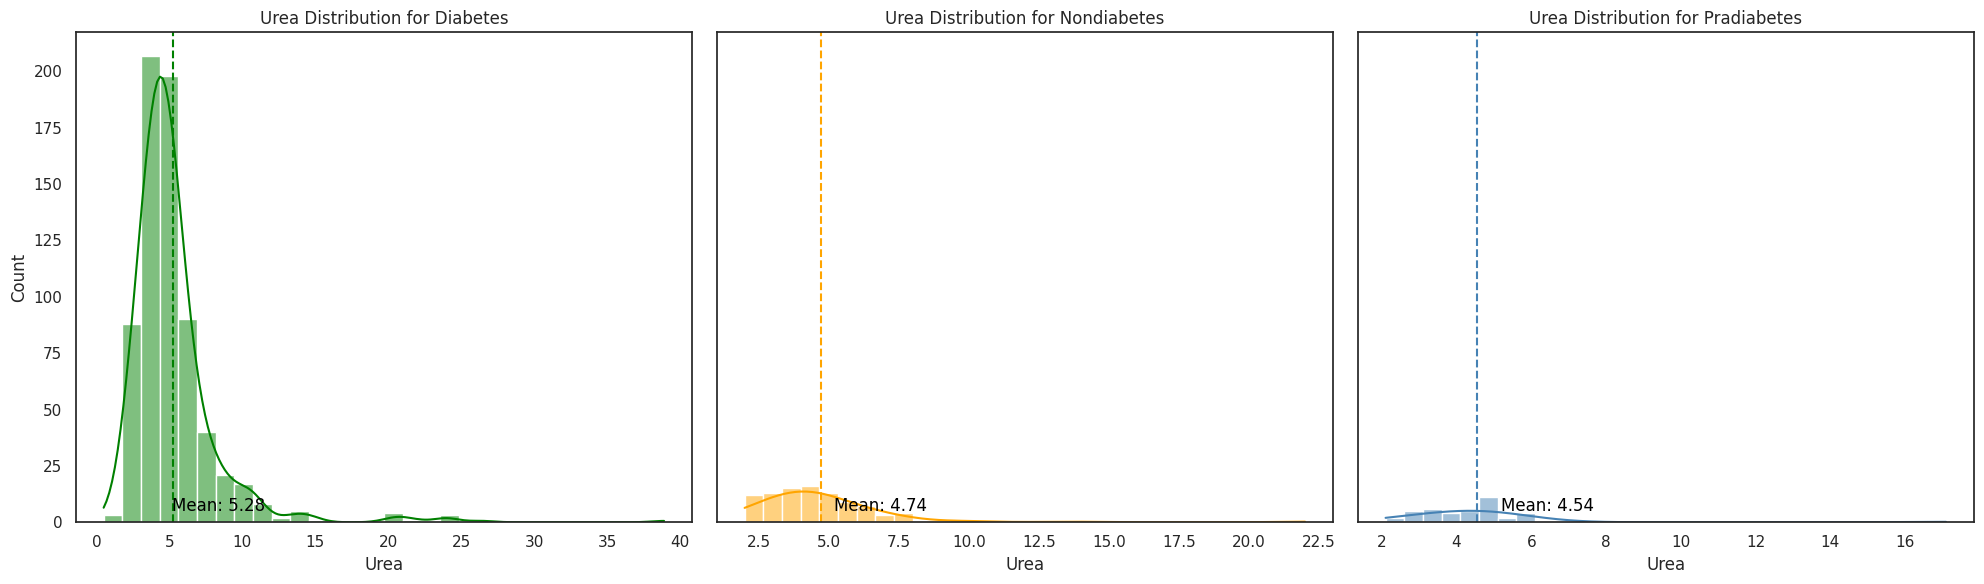

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Urea'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Urea'].mean(), color='green', linestyle='--')
axes[0].set_title('Urea Distribution for Diabetes')
axes[0].set_xlabel('Urea')
axes[0].set_ylabel('Count')
axes[0].text(data1['Urea'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Urea'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Urea'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Urea'].mean(), color='orange', linestyle='--')
axes[1].set_title('Urea Distribution for Nondiabetes')
axes[1].set_xlabel('Urea')
axes[1].set_ylabel('Count')
axes[1].text(data1['Urea'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Urea'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Urea'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Urea'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Urea Distribution for Pradiabetes')
axes[2].set_xlabel('Urea')
axes[2].set_ylabel('Count')
axes[2].text(data1['Urea'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Urea'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### HDL

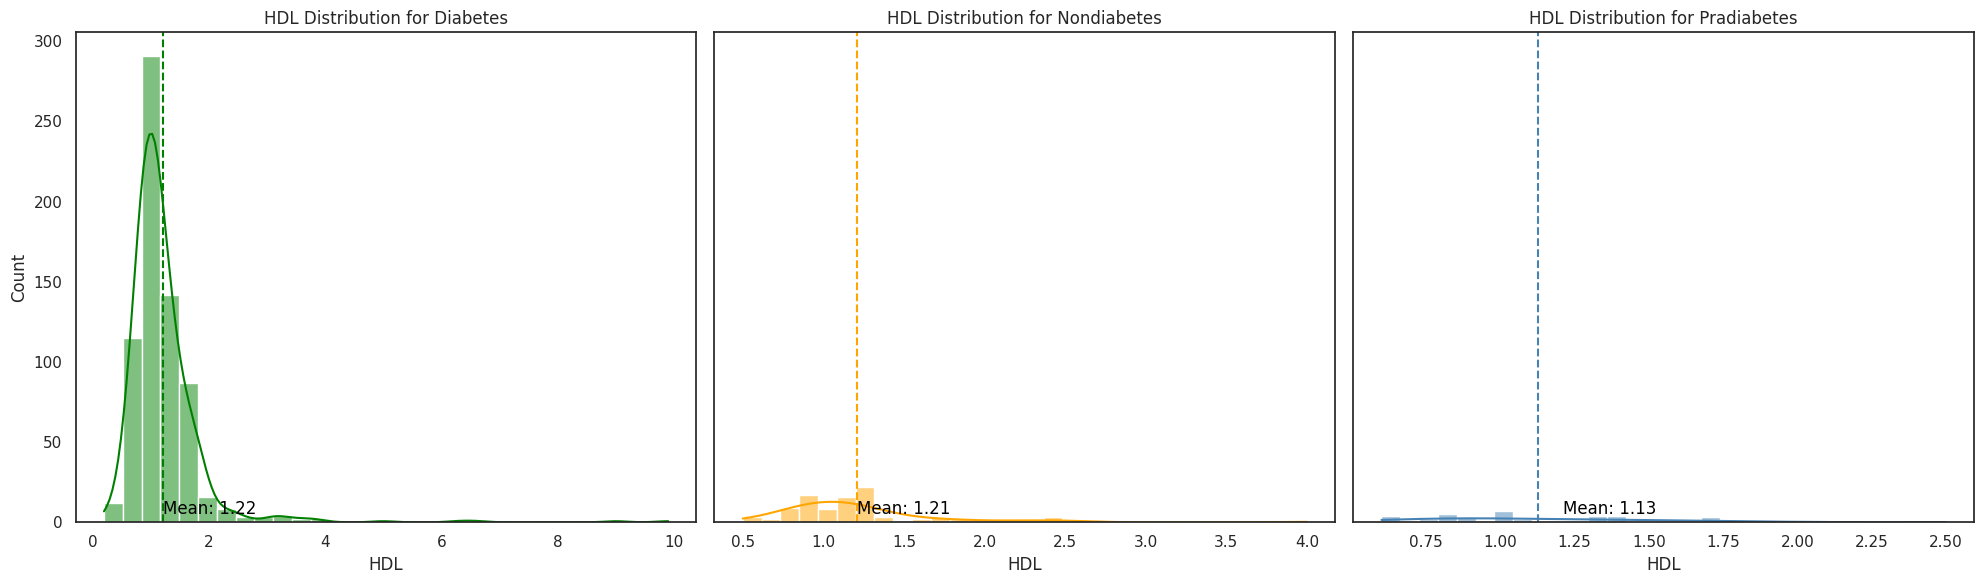

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['HDL'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['HDL'].mean(), color='green', linestyle='--')
axes[0].set_title('HDL Distribution for Diabetes')
axes[0].set_xlabel('HDL')
axes[0].set_ylabel('Count')
axes[0].text(data1['HDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['HDL'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['HDL'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['HDL'].mean(), color='orange', linestyle='--')
axes[1].set_title('HDL Distribution for Nondiabetes')
axes[1].set_xlabel('HDL')
axes[1].set_ylabel('Count')
axes[1].text(data1['HDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['HDL'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['HDL'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['HDL'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('HDL Distribution for Pradiabetes')
axes[2].set_xlabel('HDL')
axes[2].set_ylabel('Count')
axes[2].text(data1['HDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['HDL'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### LDL

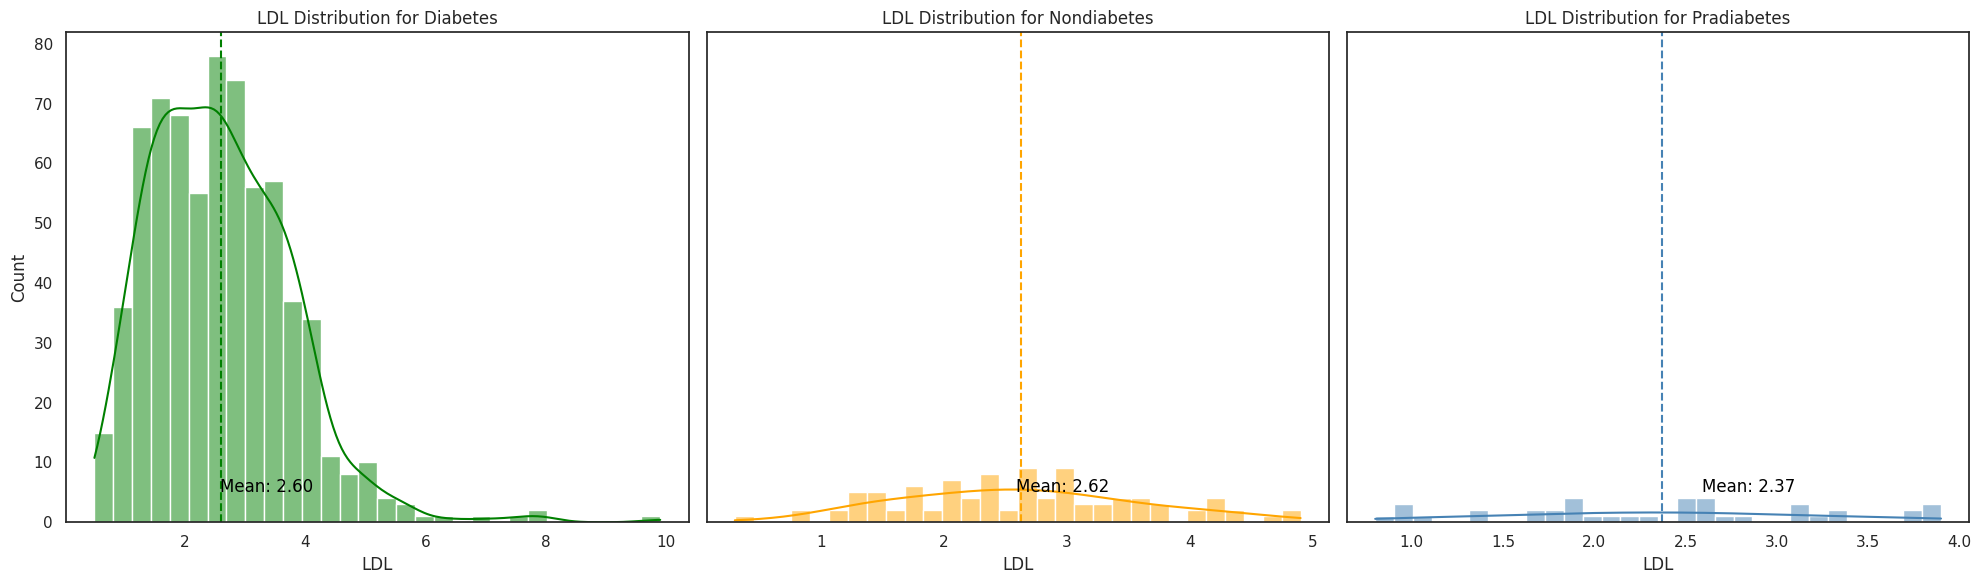

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['LDL'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['LDL'].mean(), color='green', linestyle='--')
axes[0].set_title('LDL Distribution for Diabetes')
axes[0].set_xlabel('LDL')
axes[0].set_ylabel('Count')
axes[0].text(data1['LDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['LDL'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['LDL'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['LDL'].mean(), color='orange', linestyle='--')
axes[1].set_title('LDL Distribution for Nondiabetes')
axes[1].set_xlabel('LDL')
axes[1].set_ylabel('Count')
axes[1].text(data1['LDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['LDL'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['LDL'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['LDL'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('LDL Distribution for Pradiabetes')
axes[2].set_xlabel('LDL')
axes[2].set_ylabel('Count')
axes[2].text(data1['LDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['LDL'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()

### VLDL

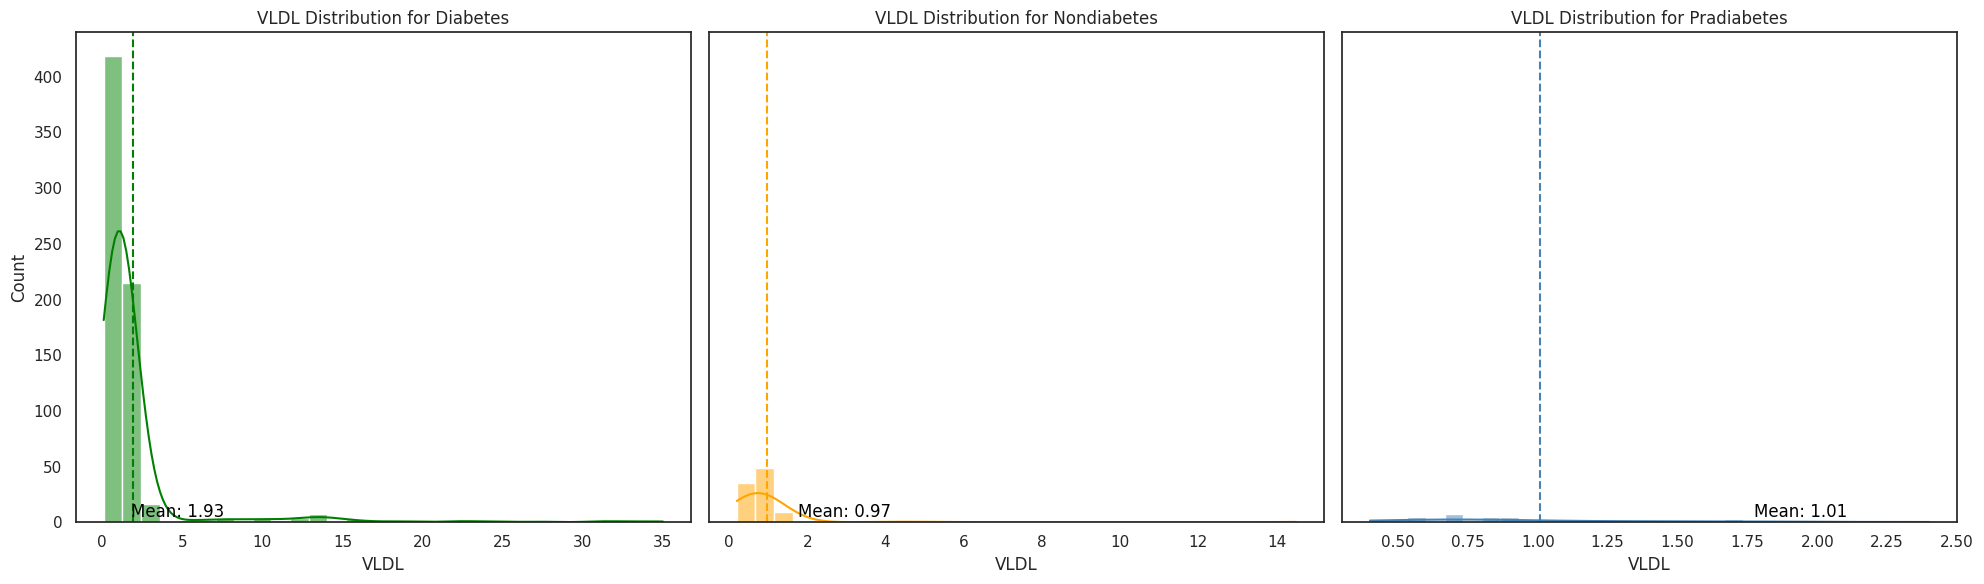

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['VLDL'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['VLDL'].mean(), color='green', linestyle='--')
axes[0].set_title('VLDL Distribution for Diabetes')
axes[0].set_xlabel('VLDL')
axes[0].set_ylabel('Count')
axes[0].text(data1['VLDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['VLDL'].mean():.2f}", color='black')

# 2. Grafik untuk Nondiabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['VLDL'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['VLDL'].mean(), color='orange', linestyle='--')
axes[1].set_title('VLDL Distribution for Nondiabetes')
axes[1].set_xlabel('VLDL')
axes[1].set_ylabel('Count')
axes[1].text(data1['VLDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['VLDL'].mean():.2f}", color='black')

# 3. Grafik untuk Pradiabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['VLDL'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['VLDL'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('VLDL Distribution for Pradiabetes')
axes[2].set_xlabel('VLDL')
axes[2].set_ylabel('Count')
axes[2].text(data1['VLDL'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['VLDL'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()



###HbA1c

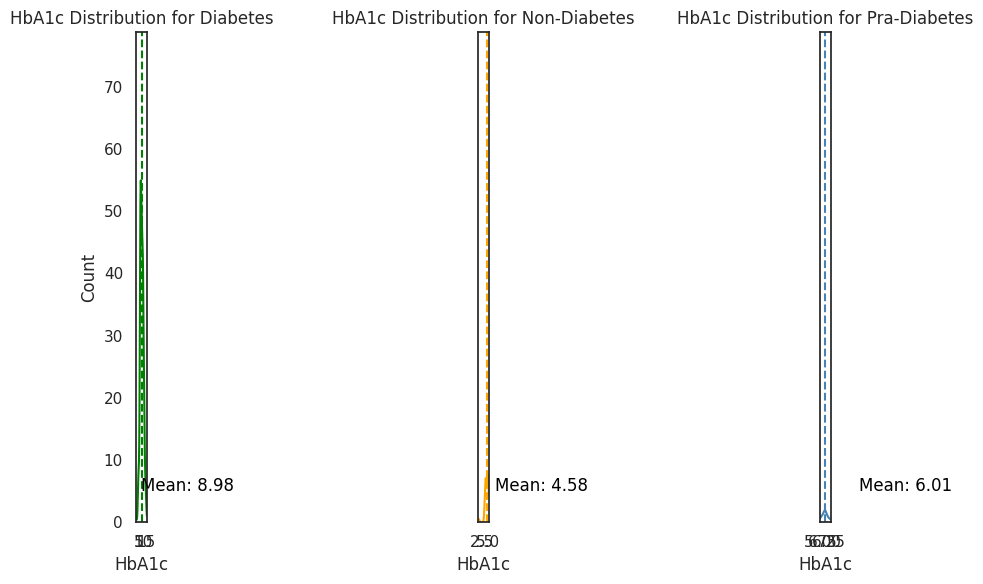

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['HbA1c'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['HbA1c'].mean(), color='green', linestyle='--')
axes[0].set_title('HbA1c Distribution for Diabetes')
axes[0].set_xlabel('HbA1c')
axes[0].set_ylabel('Count')
axes[0].text(data1['HbA1c'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['HbA1c'].mean():.2f}", color='black')

# 2. Grafik untuk Non-Diabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['HbA1c'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['HbA1c'].mean(), color='orange', linestyle='--')
axes[1].set_title('HbA1c Distribution for Non-Diabetes')
axes[1].set_xlabel('HbA1c')
axes[1].set_ylabel('Count')
axes[1].text(data1['HbA1c'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['HbA1c'].mean():.2f}", color='black')

# 3. Grafik untuk Pra-Diabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['HbA1c'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['HbA1c'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('HbA1c Distribution for Pra-Diabetes')
axes[2].set_xlabel('HbA1c')
axes[2].set_ylabel('Count')
axes[2].text(data1['HbA1c'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['HbA1c'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### Trigliserida

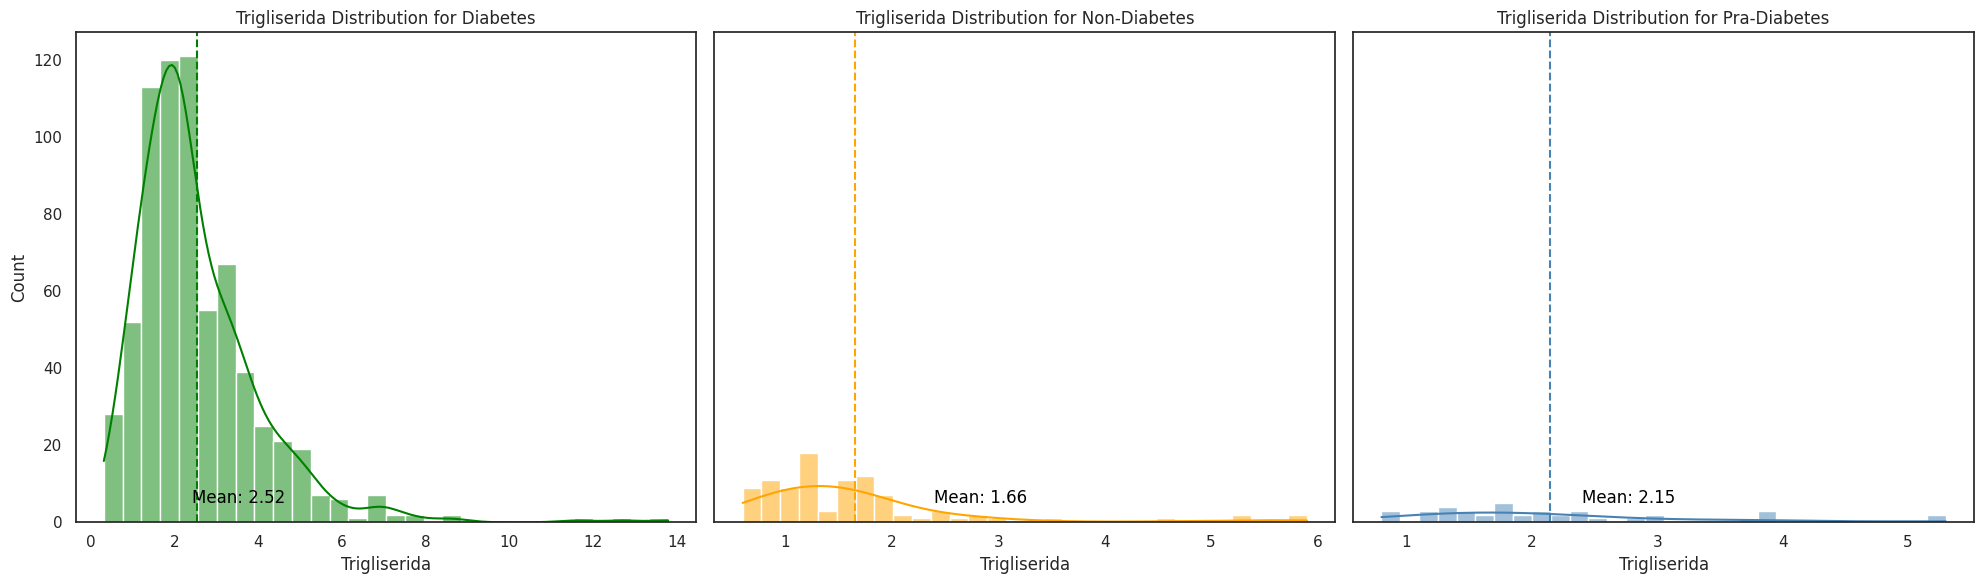

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['Trigliserida'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['Trigliserida'].mean(), color='green', linestyle='--')
axes[0].set_title('Trigliserida Distribution for Diabetes')
axes[0].set_xlabel('Trigliserida')
axes[0].set_ylabel('Count')
axes[0].text(data1['Trigliserida'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['Trigliserida'].mean():.2f}", color='black')

# 2. Grafik untuk Non-Diabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['Trigliserida'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['Trigliserida'].mean(), color='orange', linestyle='--')
axes[1].set_title('Trigliserida Distribution for Non-Diabetes')
axes[1].set_xlabel('Trigliserida')
axes[1].set_ylabel('Count')
axes[1].text(data1['Trigliserida'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['Trigliserida'].mean():.2f}", color='black')

# 3. Grafik untuk Pra-Diabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['Trigliserida'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['Trigliserida'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('Trigliserida Distribution for Pra-Diabetes')
axes[2].set_xlabel('Trigliserida')
axes[2].set_ylabel('Count')
axes[2].text(data1['Trigliserida'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['Trigliserida'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### BMI

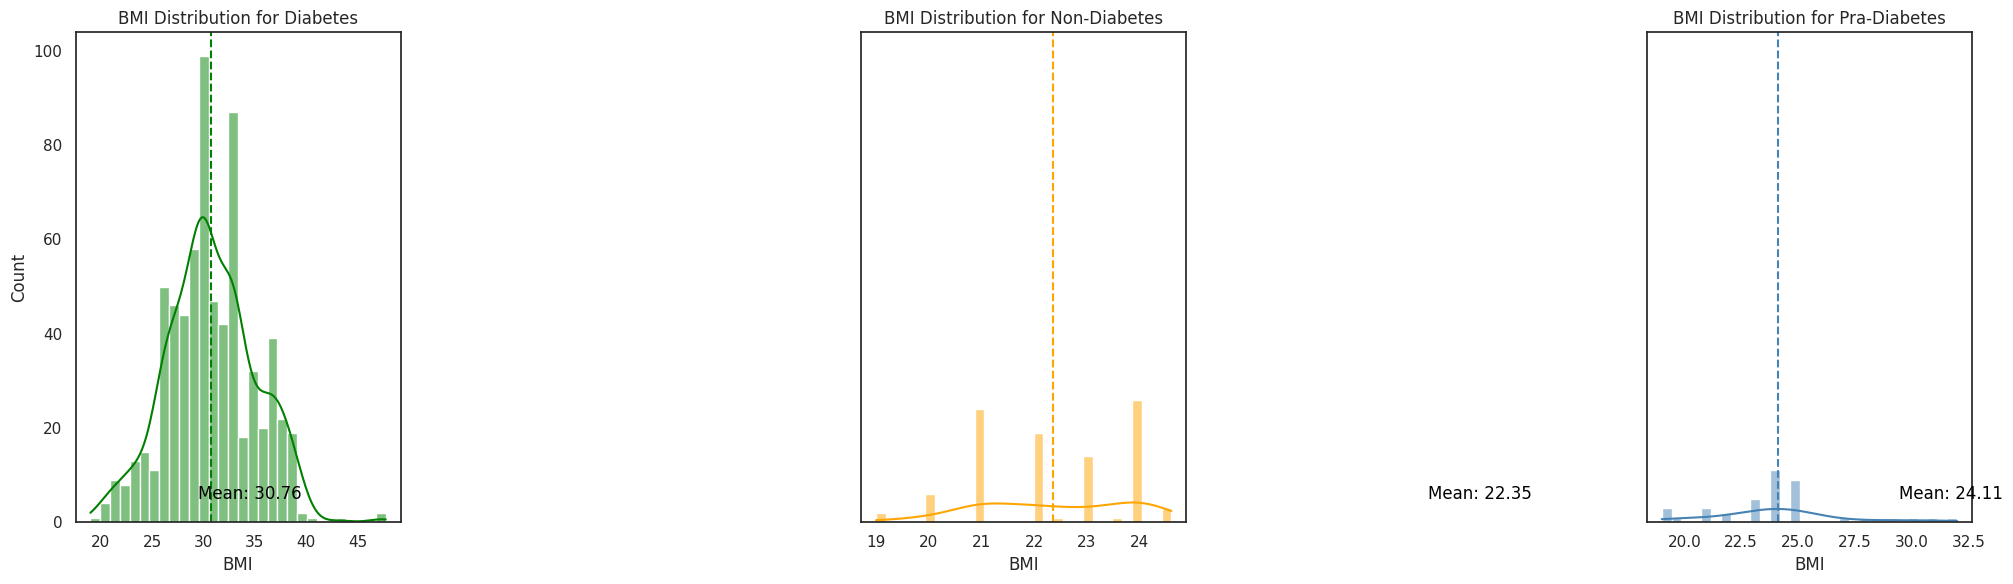

In [ ]:
sns.set(style="white")

# Membuat 3 subplot dalam 1 frame
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Warna untuk tiap class
colors = {'Diabetes': 'green', 'Nondiabetes': 'orange', 'Pradiabetes': 'steelblue'}

# 1. Grafik untuk Diabetes
sns.histplot(data1[data1['Class'] == 'Diabetes']['BMI'], kde=True, bins=30, color=colors['Diabetes'], ax=axes[0])
axes[0].axvline(data1[data1['Class'] == 'Diabetes']['BMI'].mean(), color='green', linestyle='--')
axes[0].set_title('BMI Distribution for Diabetes')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Count')
axes[0].text(data1['BMI'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Diabetes']['BMI'].mean():.2f}", color='black')

# 2. Grafik untuk Non-Diabetes
sns.histplot(data1[data1['Class'] == 'Nondiabetes']['BMI'], kde=True, bins=30, color=colors['Nondiabetes'], ax=axes[1])
axes[1].axvline(data1[data1['Class'] == 'Nondiabetes']['BMI'].mean(), color='orange', linestyle='--')
axes[1].set_title('BMI Distribution for Non-Diabetes')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Count')
axes[1].text(data1['BMI'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Nondiabetes']['BMI'].mean():.2f}", color='black')

# 3. Grafik untuk Pra-Diabetes
sns.histplot(data1[data1['Class'] == 'Pradiabetes']['BMI'], kde=True, bins=30, color=colors['Pradiabetes'], ax=axes[2])
axes[2].axvline(data1[data1['Class'] == 'Pradiabetes']['BMI'].mean(), color='steelblue', linestyle='--')
axes[2].set_title('BMI Distribution for Pra-Diabetes')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Count')
axes[2].text(data1['BMI'].mean(), 5, f"Mean: {data1[data1['Class'] == 'Pradiabetes']['BMI'].mean():.2f}", color='black')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


## Anova Test

In [ ]:
from scipy import stats

# List variabel yang akan diuji dengan ANOVA
variables = ["Cholesterol","Age", "Urea", "HDL", "LDL", "VLDL", "HbA1c", "Trigliserida", "BMI"]

# Loop untuk setiap variabel
for var in variables:
    group_nondiabetes = data1[data1["Class"] == "Nondiabetes"][var]
    group_prediabetes = data1[data1["Class"] == "Pradiabetes"][var]
    group_diabetes = data1[data1["Class"] == "Diabetes"][var]

    # Melakukan One-Way ANOVA
    f_stat, p_value = stats.f_oneway(group_nondiabetes, group_prediabetes, group_diabetes)

    # Menampilkan hasil
    print(f"ANOVA for {var}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print("-" * 40)

ANOVA for Cholesterol:
  F-statistic: 17.8041
  P-value: 0.0000
----------------------------------------
ANOVA for Age:
  F-statistic: 122.0159
  P-value: 0.0000
----------------------------------------
ANOVA for Urea:
  F-statistic: 2.2256
  P-value: 0.1087
----------------------------------------
ANOVA for HDL:
  F-statistic: 0.3254
  P-value: 0.7223
----------------------------------------
ANOVA for LDL:
  F-statistic: 0.8147
  P-value: 0.4431
----------------------------------------
ANOVA for VLDL:
  F-statistic: 4.1850
  P-value: 0.0155
----------------------------------------
ANOVA for HbA1c:
  F-statistic: 205.2142
  P-value: 0.0000
----------------------------------------
ANOVA for Trigliserida:
  F-statistic: 15.9045
  P-value: 0.0000
----------------------------------------
ANOVA for BMI:
  F-statistic: 219.2597
  P-value: 0.0000
----------------------------------------


## Chi-Square Test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(data1["Gender"], data1["Class"])

# Lakukan uji Chi-Square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Tampilkan hasil
print("Chi-Square Test for Gender")
print(f"P-value: {p_value:.4f}")

Chi-Square Test for Gender
P-value: 0.0012


## Feature Selection

###Correlation Spearman Method

/tmp/ipython-input-60-1178336459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='Spectral')


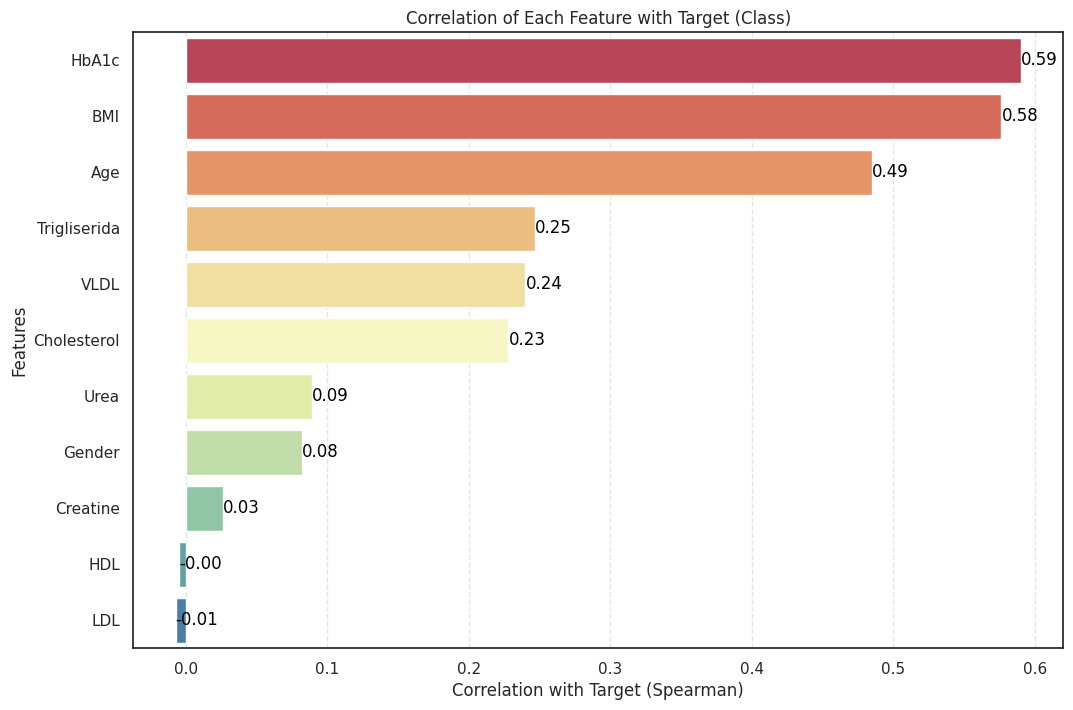

In [ ]:
# Menghitung korelasi Spearman
spearman_corr = data.corr(method='spearman')['Class'].drop('Class').sort_values(ascending=False)

# Visualisasi korelasi menggunakan barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=spearman_corr.values, y=spearman_corr.index, palette='Spectral')

# Menambahkan nilai korelasi di atas setiap bar
for i, value in enumerate(spearman_corr.values):
    ax.text(value, i, f'{value:.2f}', color='black', va='center')

# Menambahkan judul dan label
plt.title('Correlation of Each Feature with Target (Class)')
plt.xlabel('Correlation with Target (Spearman)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


### Correlation Pearson Method

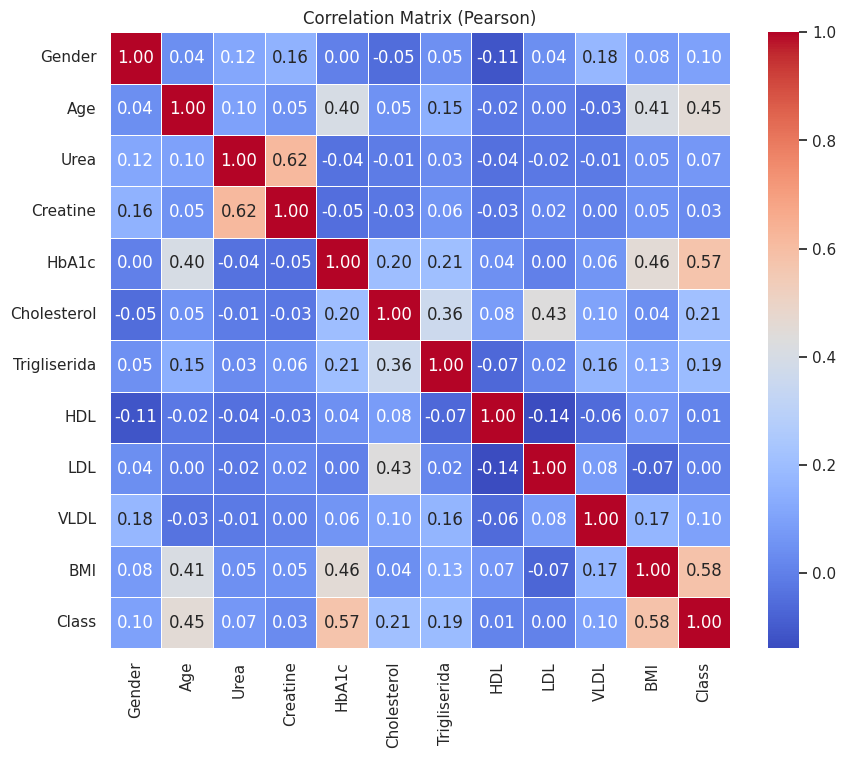

In [ ]:
correlation_matrix = data.corr(method='pearson')

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Pearson)')
plt.show()

In [ ]:
# Menghitung matriks korelasi Pearson
correlation_matrix = data.corr(method='pearson')

# Memfilter fitur dengan korelasi >= 0 terhadap variabel Class dan menghapus "Class" dari hasil
positive_corr = correlation_matrix['Class'][correlation_matrix['Class'] >= 0].drop('Class').sort_values(ascending=False)

# Membulatkan nilai korelasi hingga 2 angka di belakang koma
positive_corr = positive_corr.round(2)

# Membuat DataFrame untuk menampilkan hasil
positive_corr_table = positive_corr.reset_index()
positive_corr_table.columns = ['Feature', 'Value Correlation']

# Menampilkan tabel
from tabulate import tabulate
print(tabulate(positive_corr_table, headers='keys', tablefmt='pretty'))

# (Opsional) Menampilkan tabel dalam bentuk DataFrame
positive_corr_table

+----+--------------+-------------------+
|    |   Feature    | Value Correlation |
+----+--------------+-------------------+
| 0  |     BMI      |       0.58        |
| 1  |    HbA1c     |       0.57        |
| 2  |     Age      |       0.45        |
| 3  | Cholesterol  |       0.21        |
| 4  | Trigliserida |       0.19        |
| 5  |    Gender    |        0.1        |
| 6  |     VLDL     |        0.1        |
| 7  |     Urea     |       0.07        |
| 8  |   Creatine   |       0.03        |
| 9  |     HDL      |       0.01        |
| 10 |     LDL      |        0.0        |
+----+--------------+-------------------+


,Feature,Value Correlation
0,BMI,0.58
1,HbA1c,0.57
2,Age,0.45
3,Cholesterol,0.21
4,Trigliserida,0.19
5,Gender,0.10
6,VLDL,0.10
7,Urea,0.07
8,Creatine,0.03
9,HDL,0.01


In [ ]:
# Menghitung matriks korelasi Pearson
correlation_matrix = data.corr(method='pearson')

# Memfilter fitur dengan korelasi < 0 terhadap variabel Class dan membulatkan hingga 2 angka di belakang koma
negative_corr = correlation_matrix['Class'][correlation_matrix['Class'] < 0].sort_values(ascending=False).round(2)

# Membuat DataFrame untuk menampilkan hasil
negative_corr_table = negative_corr.reset_index()
negative_corr_table.columns = ['Feature', 'Value Correlation']

# Menampilkan tabel
from tabulate import tabulate
print(tabulate(negative_corr_table, headers='keys', tablefmt='pretty'))

# (Opsional) Menampilkan tabel dalam bentuk DataFrame
negative_corr_table

+---------+-------------------+
| Feature | Value Correlation |
+---------+-------------------+
+---------+-------------------+


,Feature,Value Correlation


## Splitting Data

In [ ]:
x = data.drop(columns=["HDL","LDL","Class"])
y = data["Class"]

In [ ]:
# Skenario 1
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

# Skenario 2
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Skenario 3
x3_train, x3_test, y3_train, y3_test = train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

# Cek ukuran dataset yang dihasilkan
print(f"Skenario 1 - Train: {x1_train.shape}, Test: {x1_test.shape}")
print(f"Skenario 2 - Train: {x2_train.shape}, Test: {x2_test.shape}")
print(f"Skenario 3 - Train: {x3_train.shape}, Test: {x3_test.shape}")

Skenario 1 - Train: (578, 9), Test: (248, 9)
Skenario 2 - Train: (660, 9), Test: (166, 9)
Skenario 3 - Train: (743, 9), Test: (83, 9)


### Model basic


**Final Model Accuracy:** 0.9919


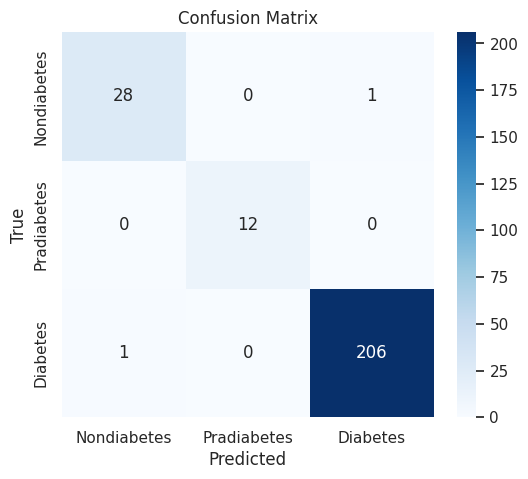


**Classification Report:**
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       207

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248


**Evaluasi Model (Rata-rata Macro Avg):**
Akurasi : 0,9919
Presisi : 0,9869
Recall  : 0,9869
F1      : 0,9869


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Misal parameter optimal sudah didapatkan
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Latih model dengan data training
model.fit(x1_train, y1_train)

# Prediksi data test
y1_pred = model.predict(x1_test)

# Hitung akurasi akhir
final_accuracy = accuracy_score(y1_test, y1_pred)
print(f"\n**Final Model Accuracy:** {final_accuracy:.4f}")

# Hitung confusion matrix
cm = confusion_matrix(y1_test, y1_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'],
    yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
print("\n**Classification Report:**")
classification_rep = classification_report(y1_test, y1_pred, output_dict=True)
print(classification_report(y1_test, y1_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Cetak hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")

### Model basic 2


**Final Model Accuracy (Skenario 2):** 0.9880


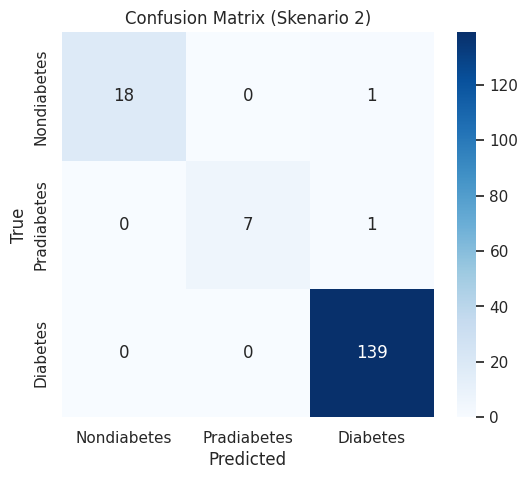


**Classification Report (Skenario 2):**
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      0.88      0.93         8
           2       0.99      1.00      0.99       139

    accuracy                           0.99       166
   macro avg       1.00      0.94      0.97       166
weighted avg       0.99      0.99      0.99       166


**Evaluasi Model (Rata-rata Macro Avg) Skenario 2:**
Akurasi : 0,9880
Presisi : 0,9953
Recall  : 0,9408
F1      : 0,9664


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Misal parameter optimal sudah didapatkan (gunakan parameter yang sesuai skenario 2)
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Latih model dengan data training skenario 2
model.fit(x2_train, y2_train)

# Prediksi data test skenario 2
y2_pred = model.predict(x2_test)

# Hitung akurasi akhir
final_accuracy = accuracy_score(y2_test, y2_pred)
print(f"\n**Final Model Accuracy (Skenario 2):** {final_accuracy:.4f}")

# Hitung confusion matrix
cm = confusion_matrix(y2_test, y2_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'],
    yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Skenario 2)')
plt.show()

# Tampilkan classification report
print("\n**Classification Report (Skenario 2):**")
classification_rep = classification_report(y2_test, y2_pred, output_dict=True)
print(classification_report(y2_test, y2_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Cetak hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg) Skenario 2:**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


### Model basic 3

CV Accuracy per fold: [1.         0.98666667 1.         0.97297297 1.         0.97297297
 1.         0.97297297 0.97297297 0.97297297]
Mean CV Accuracy: 0.9852

**Final Model Accuracy (Skenario 3):** 1.0000


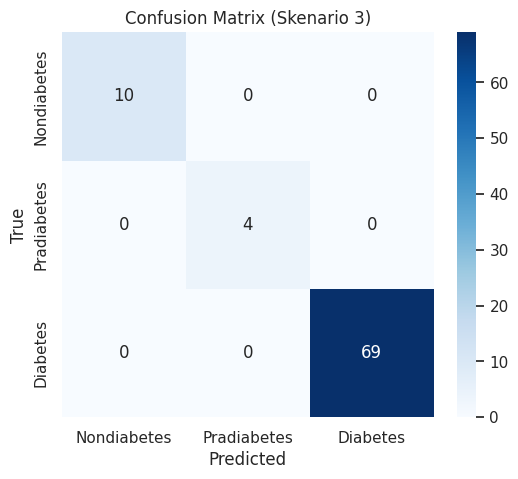


**Classification Report (Skenario 3):**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        69

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83


**Evaluasi Model (Rata-rata Macro Avg) Skenario 3:**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definisikan model dengan parameter yang sama
model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    random_state=42
)

# Lakukan 10-Fold Cross Validation pada data training
cv_scores = cross_val_score(model, x3_train, y3_train, cv=10, scoring='accuracy')
print(f"CV Accuracy per fold: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Latih model final dengan seluruh data training
model.fit(x3_train, y3_train)

# Prediksi data test
y3_pred = model.predict(x3_test)

# Hitung akurasi akhir pada test set
final_accuracy = accuracy_score(y3_test, y3_pred)
print(f"\n**Final Model Accuracy (Skenario 3):** {final_accuracy:.4f}")

# Hitung confusion matrix
cm = confusion_matrix(y3_test, y3_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'],
    yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes']
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Skenario 3)')
plt.show()

# Tampilkan classification report
print("\n**Classification Report (Skenario 3):**")
classification_rep = classification_report(y3_test, y3_pred, output_dict=True)
print(classification_report(y3_test, y3_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Cetak hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg) Skenario 3:**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


# Modelling


### COBA Cross VAL

In [ ]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO tanpa splitting manual
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    model1 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42,
    )

    # Langsung cross-validation 10-fold pada seluruh dataset (x1, y1)
    cv_scores = cross_val_score(model1, x, y, cv=10, scoring='accuracy')

    return 1 - np.mean(cv_scores)

# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 200
max_depth: 11
learning_rate: 0.010
subsample: 0.86
colsample_bytree: 0.98
gamma: 0.00

Optimal Accuracy: 0.9601968851013811
CPU times: user 2h 20min 57s, sys: 4min 52s, total: 2h 25min 49s
Wall time: 1h 20min 46s



**Final Model Accuracy (10-fold CV):** 0.9600


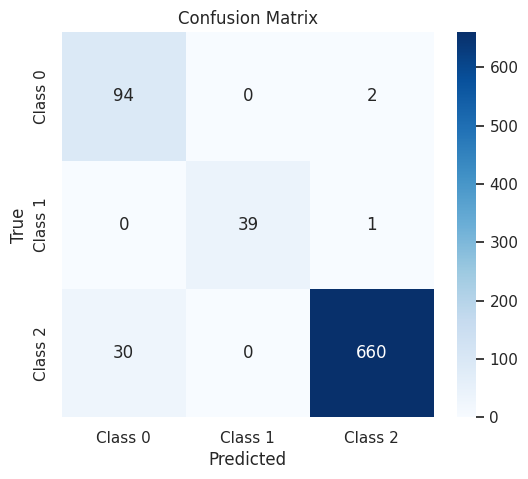


**Classification Report (10-fold CV):**
              precision    recall  f1-score   support

           0       0.76      0.98      0.85        96
           1       1.00      0.97      0.99        40
           2       1.00      0.96      0.98       690

    accuracy                           0.96       826
   macro avg       0.92      0.97      0.94       826
weighted avg       0.97      0.96      0.96       826


**Evaluasi Model (Rata-rata Macro Avg):**
Akurasi : 0,9600
Presisi : 0,9178
Recall  : 0,9702
F1      : 0,9392
CPU times: user 4.58 s, sys: 119 ms, total: 4.7 s
Wall time: 3.31 s


In [ ]:
%%time

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ambil parameter optimal yang sudah ditemukan
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal
model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Menggunakan cross_val_predict untuk mendapatkan prediksi pada setiap fold
y_pred = cross_val_predict(model, x, y, cv=10)

# Evaluasi model
accuracy = accuracy_score(y, y_pred)
print(f"\n**Final Model Accuracy (10-fold CV):** {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n**Classification Report (10-fold CV):**")
classification_rep = classification_report(y, y_pred, output_dict=True)
print(classification_report(y, y_pred))

# Ambil nilai macro average (rata-rata antar kelas)
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

# Menampilkan hasil evaluasi macro average
print("\n**Evaluasi Model (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


## Skenario 1

### Optimize parameter with PSO

In [ ]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    # Pastikan parameter dalam rentang yang valid
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    # Inisialisasi Model XGBoost
    model1 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

    # Melatih Model
    model1.fit(x1_train, y1_train)

    # Prediksi dan Evaluasi
    y1_pred = model1.predict(x1_test)
    accuracy_1 = accuracy_score(y1_test, y1_pred)

    return 1 - accuracy_1  # Minimalkan error rate


# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO untuk menemukan parameter terbaik
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

# Hasil Optimal
print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 184
max_depth: 3
learning_rate: 0.218
subsample: 1.00
colsample_bytree: 1.00
gamma: 0.00

Optimal Accuracy: 1.0
CPU times: user 7min 28s, sys: 13 s, total: 7min 41s
Wall time: 4min 13s


### Model with optimize parameter

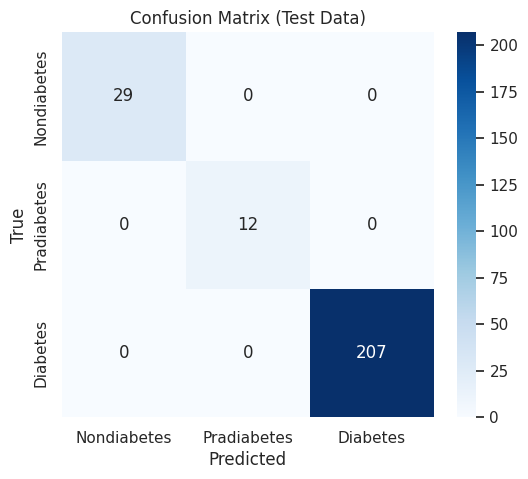


**Classification Report (Test Data):**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00       207

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248


**Evaluasi Model (Test Data):**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil parameter optimal yang sudah ditemukan
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal
final_xgb_model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Melatih Model dengan Parameter Optimal
final_xgb_model.fit(x1_train, y1_train)

# Prediksi pada Data Uji
y1_pred = final_xgb_model.predict(x1_test)

# Confusion Matrix pada Data Uji
cm = confusion_matrix(y1_test, y1_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'], yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Classification Report pada Data Uji
classification_rep = classification_report(y1_test, y1_pred, output_dict=True)

# Menampilkan Classification Report
print("\n**Classification Report (Test Data):**")
print(classification_report(y1_test, y1_pred))

# Evaluasi Model pada Data Uji
final_accuracy = accuracy_score(y1_test, y1_pred)
# Ambil macro avg
macro = classification_rep['macro avg']
# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')


# Menampilkan Evaluasi Model
print("\n**Evaluasi Model (Test Data):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


## Skenario 2

### Optimize parameter with PSO

In [ ]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    # Pastikan parameter dalam rentang yang valid
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    # Inisialisasi Model XGBoost
    model1 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

    # Melatih Model
    model2.fit(x2_train, y2_train)

    # Prediksi dan Evaluasi
    y2_pred = model2.predict(x2_test)
    accuracy_2 = accuracy_score(y2_test, y2_pred)

    return 1 - accuracy_2  # Minimalkan error rate


# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO untuk menemukan parameter terbaik
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

# Hasil Optimal
print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


NameError: name 'model2' is not defined

### Model with optimize parameter

---



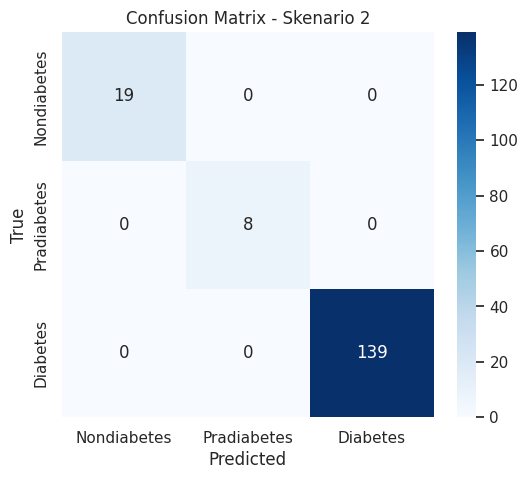


**Classification Report for Skenario 2:**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00       139

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166


**Evaluasi Model Skenario 2 (Rata-rata Macro Avg):**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil parameter optimal yang sudah ditemukan untuk Skenario 2
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal
final_xgb_model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Melatih Model dengan Parameter Optimal untuk Skenario 2
final_xgb_model.fit(x2_train, y2_train)

# Prediksi pada Data Uji untuk Skenario 2
y2_pred = final_xgb_model.predict(x2_test)

# Matriks Kebingungannya untuk Skenario 2
cm = confusion_matrix(y2_test, y2_pred)

# Plot Matriks Kebingungannya
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'], yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Skenario 2')
plt.show()

# Laporan Klasifikasi untuk Skenario 2
print("\n**Classification Report for Skenario 2:**")
classification_rep = classification_report(y2_test, y2_pred, output_dict=True)
print(classification_report(y2_test, y2_pred))

# Evaluasi Model untuk Skenario 2
final_accuracy = accuracy_score(y2_test, y2_pred)

# Ambil macro avg dari laporan klasifikasi
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

print("\n**Evaluasi Model Skenario 2 (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")


## Skenario 3

### Optimize parameter with PSO

In [ ]:
%%time

from sklearn.metrics import accuracy_score
from pyswarm import pso
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Fungsi Objektif untuk PSO
def pso_objective(params):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma = params

    # Pastikan parameter dalam rentang yang valid
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)

    # Inisialisasi Model XGBoost
    model3 = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

    # Melatih Model
    model3.fit(x3_train, y3_train)

    # Prediksi dan Evaluasi
    y3_pred = model3.predict(x3_test)
    accuracy_3 = accuracy_score(y3_test, y3_pred)

    return 1 - accuracy_3  # Minimalkan error rate


# Rentang Parameter yang Dioptimalkan
bounds = [
    (10, 200),      # n_estimators
    (3, 15),        # max_depth
    (0.01, 0.3),    # learning_rate
    (0.6, 1.0),     # subsample
    (0.6, 1.0),     # colsample_bytree
    (0, 5)          # gamma
]

# Jalankan PSO untuk menemukan parameter terbaik
optimal_params, optimal_score = pso(
    pso_objective,
    lb=[b[0] for b in bounds],
    ub=[b[1] for b in bounds],
    swarmsize=20,
    maxiter=150,
    omega=0.9,
    phip=1.5,
    phig=1.5
)

# Hasil Optimal
print("\nOptimal Parameters:")
print(f"n_estimators: {int(optimal_params[0])}")
print(f"max_depth: {int(optimal_params[1])}")
print(f"learning_rate: {optimal_params[2]:.3f}")
print(f"subsample: {optimal_params[3]:.2f}")
print(f"colsample_bytree: {optimal_params[4]:.2f}")
print(f"gamma: {optimal_params[5]:.2f}")

print("\nOptimal Accuracy:", 1 - optimal_score)


Stopping search: maximum iterations reached --> 150

Optimal Parameters:
n_estimators: 171
max_depth: 3
learning_rate: 0.113
subsample: 0.93
colsample_bytree: 0.85
gamma: 1.28

Optimal Accuracy: 1.0
CPU times: user 6min 43s, sys: 10.9 s, total: 6min 54s
Wall time: 3min 48s


### Model with optimize parameter


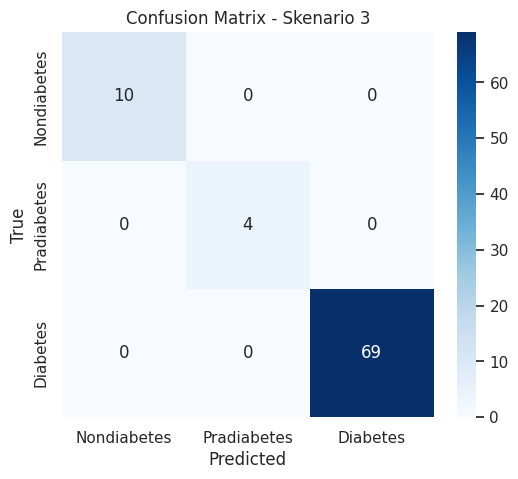


**Classification Report for Skenario 3:**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        69

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83


**Evaluasi Model Skenario 3 (Rata-rata Macro Avg):**
Akurasi : 1,0000
Presisi : 1,0000
Recall  : 1,0000
F1      : 1,0000


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil parameter optimal yang sudah ditemukan untuk Skenario 3
optimal_n_estimators = int(optimal_params[0])
optimal_max_depth = int(optimal_params[1])
optimal_learning_rate = float(optimal_params[2])
optimal_subsample = float(optimal_params[3])
optimal_colsample_bytree = float(optimal_params[4])
optimal_gamma = float(optimal_params[5])

# Inisialisasi Model XGBoost dengan parameter optimal untuk Skenario 3
final_xgb_model = XGBClassifier(
    n_estimators=optimal_n_estimators,
    max_depth=optimal_max_depth,
    learning_rate=optimal_learning_rate,
    subsample=optimal_subsample,
    colsample_bytree=optimal_colsample_bytree,
    gamma=optimal_gamma,
    random_state=42
)

# Melatih Model dengan Parameter Optimal untuk Skenario 3
final_xgb_model.fit(x3_train, y3_train)

# Prediksi pada Data Uji untuk Skenario 3
y3_pred = final_xgb_model.predict(x3_test)

# Matriks Kebingungannya untuk Skenario 3
cm = confusion_matrix(y3_test, y3_pred)

# Plot Matriks Kebingungannya
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'], yticklabels=['Nondiabetes', 'Pradiabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Skenario 3')
plt.show()

# Laporan Klasifikasi untuk Skenario 3
print("\n**Classification Report for Skenario 3:**")
classification_rep = classification_report(y3_test, y3_pred, output_dict=True)
print(classification_report(y3_test, y3_pred))

# Evaluasi Model untuk Skenario 3
final_accuracy = accuracy_score(y3_test, y3_pred)

# Ambil macro avg dari laporan klasifikasi
macro = classification_rep['macro avg']

# Format angka dengan koma sebagai pemisah desimal
accuracy_str = f"{final_accuracy:.4f}".replace('.', ',')
precision_str = f"{macro['precision']:.4f}".replace('.', ',')
recall_str = f"{macro['recall']:.4f}".replace('.', ',')
f1_str = f"{macro['f1-score']:.4f}".replace('.', ',')

print("\n**Evaluasi Model Skenario 3 (Rata-rata Macro Avg):**")
print(f"Akurasi : {accuracy_str}")
print(f"Presisi : {precision_str}")
print(f"Recall  : {recall_str}")
print(f"F1      : {f1_str}")
